In [1]:
import pandas as pd

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# View the first few rows
print(train_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### **2. Data Cleaning**
- Check for missing values and handle them manually:
  - Fill missing `Age` with the median.
  - Fill missing `Embarked` with the mode.
  - Mark missing `Cabin` values as "Unknown" or remove them.


In [2]:
# Handle missing data
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')

# Drop columns that may not be useful
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


### **3. Exploratory Data Analysis (EDA)**
Use visualizations to explore the data. For example:
- Distribution of `Survived`.
- Analyze how survival depends on `Sex`, `Age`, and `Pclass`.


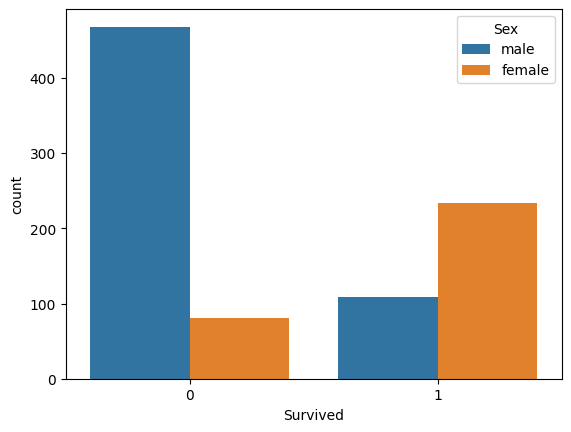

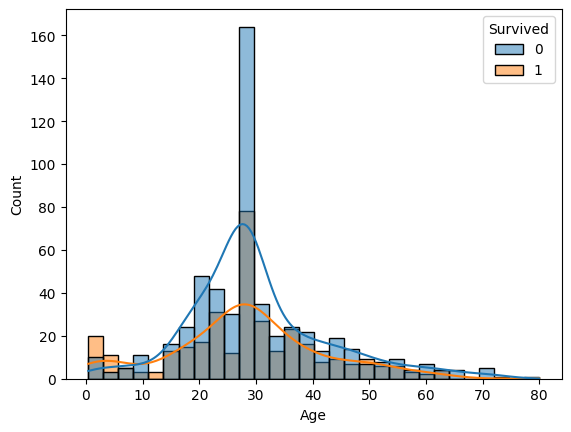

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Survival by Sex
sns.countplot(data=train_data, x='Survived', hue='Sex')
plt.show()

# Example: Age distribution by Survival
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)
plt.show()


### **4. Feature Engineering**
- Convert categorical features into numerical ones (e.g., `Sex` and `Embarked`).
- Add new features, like family size.

In [4]:
# Convert categorical features
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Create a new feature for family size
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']

### **5. Manual Implementation of a Classifier**
We’ll implement a basic decision tree classifier manually or use a rule-based approach as a starting point.

#### Example: Decision Tree Classifier (Simplified)


In [5]:
def decision_tree_predict(row):
    if row['Sex'] == 1 and row['Pclass'] == 1:
        return 1  # Predict survived
    elif row['Age'] < 10:
        return 1  # Predict survived
    else:
        return 0  # Predict did not survive

# Apply the rule to make predictions
train_data['Prediction'] = train_data.apply(decision_tree_predict, axis=1)

# Calculate accuracy
correct_predictions = (train_data['Prediction'] == train_data['Survived']).sum()
accuracy = correct_predictions / len(train_data)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


### **6. Regression Model for Age**
For predicting missing ages, you can use a simple mean-based or linear regression approximation.

#### Example: Linear Regression Implementation


In [6]:
import numpy as np

# Fit a simple linear regression: Age ~ Pclass + SibSp + Parch
X = train_data[['Pclass', 'SibSp', 'Parch']].values
y = train_data['Age'].values

# Add a bias column for the intercept
X = np.column_stack((np.ones(X.shape[0]), X))

# Calculate coefficients manually using the normal equation
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Predict missing ages
y_pred = X @ coefficients

# Calculate RMSE
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print(f"RMSE: {rmse:.2f}")

RMSE: 11.88


### **7. Performance Metrics**
Manually compute precision, recall, and accuracy:


In [7]:
# Precision, Recall, and Accuracy Calculation
true_positive = ((train_data['Prediction'] == 1) & (train_data['Survived'] == 1)).sum()
false_positive = ((train_data['Prediction'] == 1) & (train_data['Survived'] == 0)).sum()
false_negative = ((train_data['Prediction'] == 0) & (train_data['Survived'] == 1)).sum()
true_negative = ((train_data['Prediction'] == 0) & (train_data['Survived'] == 0)).sum()

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
accuracy = (true_positive + true_negative) / len(train_data)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.83
Recall: 0.38
Accuracy: 0.73
